# Machine Learning in Condensed Matter Physics

# 1. Compare different machine learning models

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1.1 Fit functions with one variable

In [2]:
from sklearn.linear_model import LinearRegression as lm
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neural_network import MLPRegressor as nn

Define functions we are going to use

In [3]:
# smooth function
def smooth(x):
    return 2*np.sin(x*np.pi)+3*np.sin(3.2*x*np.pi)+9*x

# discontinuous function
def step(x):
    return np.where(x<0.5, 10, 0)

# divergence function
def diverge(x):
    return np.where(x<0.5, 0.1/(0.52-x)+5, 0.2/(x-0.48))

Generate data using a given function

In [15]:
f = smooth
np.random.seed(1)

train_x = np.random.random(500)
train_y = f(train_x) + np.random.normal(loc=0, scale=1, size=len(train_x))
train_x = train_x.reshape([-1,1])

test_x = np.linspace(0,1,100, endpoint=True)
test_y = f(test_x) + np.random.normal(loc=0, scale=1, size=len(test_x))
test_x = test_x.reshape([-1,1])

***simple linear regression***

In [16]:
fit_lm = lm()
fit_lm.fit(train_x, train_y)
pred_lm = fit_lm.predict(test_x)
print("training R^2 = {:.2f}".format(fit_lm.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_lm.score(test_x, test_y)))

training R^2 = 0.63
testing  R^2 = 0.59


***random forest***

In [17]:
fit_rf = rf(n_estimators=500, max_features=0.33, oob_score=True)
fit_rf.fit(train_x, train_y)
pred_rf = fit_rf.predict(test_x)
print("OOB Score = {:.2f}".format(fit_rf.oob_score_))

OOB Score = 0.87


***neural network*** with one/two hidden layers

In [18]:
fit_nn1 = nn(hidden_layer_sizes=(100,), alpha=0.000, max_iter=2000)
fit_nn1.fit(train_x, train_y)
pred_nn1 = fit_nn1.predict(test_x)
print("One hidden layer:")
print("training R^2 = {:.2f}".format(fit_nn1.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn1.score(test_x, test_y)))

fit_nn2 = nn(hidden_layer_sizes=(100,20), alpha=0.000, max_iter=2000)
fit_nn2.fit(train_x, train_y)
pred_nn2 = fit_nn2.predict(test_x)
print("Two hidden layers:")
print("training R^2 = {:.2f}".format(fit_nn2.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn2.score(test_x, test_y)))

One hidden layer:
training R^2 = 0.65
testing  R^2 = 0.61
Two hidden layers:
training R^2 = 0.65
testing  R^2 = 0.61


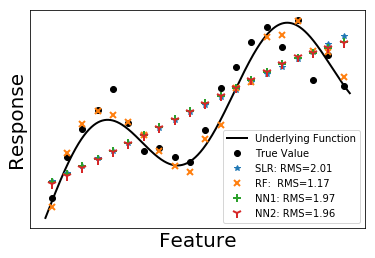

In [19]:
def root_mean_square(x, y):
    return np.sqrt(np.mean((x-y)**2))

plt.figure(figsize=(6,4))
x = np.linspace(0,1,100000)
plt.plot(x, f(x), 'k-', lw=2, label="Underlying Function")
plt.plot(test_x[2::5], test_y[2::5], 'ko', label="True Value")
plt.plot(test_x[2::5], pred_lm[2::5], '*', label="SLR: RMS={:.2f}".format(root_mean_square(test_y, pred_lm)))
plt.plot(test_x[2::5], pred_rf[2::5], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  RMS={:.2f}".format(root_mean_square(test_y, pred_rf)))
plt.plot(test_x[2::5], pred_nn1[2::5], '+', markeredgewidth=2, markersize=8, \
         label="NN1: RMS={:.2f}".format(root_mean_square(test_y, pred_nn1)))
plt.plot(test_x[2::5], pred_nn2[2::5], '1', markeredgewidth=2, markersize=9, \
         label="NN2: RMS={:.2f}".format(root_mean_square(test_y, pred_nn2)))
plt.legend(loc='best')
plt.xlabel("Feature", fontsize=20)
plt.ylabel("Response", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

## 1.2 Fit categorical data with binary class

In [2]:
from sklearn.linear_model import LogisticRegression as lm
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neural_network import MLPClassifier as nn

Define the underlying distribution functions of the data. Assume the data follows Bernoulli distribution.

In [3]:
# sigmoid function
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

# non-smooth function
def angle(x):
    return np.where(x<0, np.exp(x/6), np.exp(-x/6))

Generate data using a given function

In [9]:
### generate data
f = angle
np.random.seed(1)

train_x = 40*np.random.random(500)-20
train_y = np.random.binomial(1, f(train_x))
train_x = train_x.reshape([-1,1])

test_x = np.linspace(-20,20,100, endpoint=True)
test_y = np.random.binomial(1, f(test_x))
test_x = test_x.reshape([-1,1])

***simple logistic regression***

In [10]:
fit_lm = lm()
fit_lm.fit(train_x, train_y)
pred_lm = fit_lm.predict_proba(test_x)[:,1]
print("training R^2 = {:.2f}".format(fit_lm.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_lm.score(test_x, test_y)))

training R^2 = 0.73
testing  R^2 = 0.73


***random forest***

In [11]:
fit_rf = rf(n_estimators=500, max_features=0.33, oob_score=True)
fit_rf.fit(train_x, train_y)
pred_rf = fit_rf.predict_proba(test_x)[:,1]
print("OOB Score = {:.2f}".format(fit_rf.oob_score_))

OOB Score = 0.73


***neural network*** with one/two hidden layers

In [12]:
fit_nn1 = nn(hidden_layer_sizes=(100,), alpha=0.000, max_iter=2000)
fit_nn1.fit(train_x, train_y)
pred_nn1 = fit_nn1.predict_proba(test_x)[:,1]
print("One hidden layer:")
print("training R^2 = {:.2f}".format(fit_nn1.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn1.score(test_x, test_y)))

fit_nn2 = nn(hidden_layer_sizes=(100,20), alpha=0.000, max_iter=2000)
fit_nn2.fit(train_x, train_y)
pred_nn2 = fit_nn2.predict_proba(test_x)[:,1]
print("Two hidden layers:")
print("training R^2 = {:.2f}".format(fit_nn2.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn2.score(test_x, test_y)))

One hidden layer:
training R^2 = 0.83
testing  R^2 = 0.79
Two hidden layers:
training R^2 = 0.83
testing  R^2 = 0.78


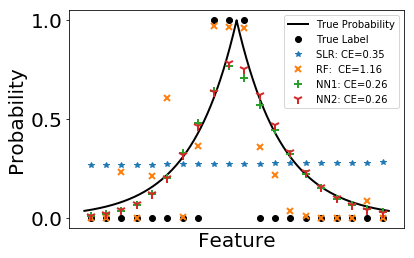

In [13]:
def cross_entropy(x, y):
    x = x.ravel()
    y = y.ravel()
    return -np.mean(np.where(y, np.log(x+1e-16), 0))
    
plt.figure(figsize=(6,4))
x = np.linspace(-20,20,100000)
plt.plot(x, f(x), 'k-', lw=2, label="True Probability")
plt.plot(test_x[2::5], test_y[2::5], 'ko', label="True Label")
plt.plot(test_x[2::5], pred_lm[2::5], '*', label="SLR: CE={:.2f}".format(cross_entropy(pred_lm, test_y)))
plt.plot(test_x[2::5], pred_rf[2::5], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  CE={:.2f}".format(cross_entropy(pred_rf, test_y)))
plt.plot(test_x[2::5], pred_nn1[2::5], '+', markeredgewidth=2, markersize=8, \
         label="NN1: CE={:.2f}".format(cross_entropy(pred_nn1, test_y)))
plt.plot(test_x[2::5], pred_nn2[2::5], '1', markeredgewidth=2, markersize=9, \
         label="NN2: CE={:.2f}".format(cross_entropy(pred_nn2, test_y)))
plt.legend(loc='best')
plt.xlabel("Feature", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.xticks([])
plt.yticks([0,0.5,1], fontsize=20)
plt.show()

# 2. Classic Ising model

In [1]:
import numpy as np
import matplotlib.pylab as plt
from time import time
%matplotlib inline

We use classical Monte Carlo to generate configurations at given temperature. For simplicity, we only consider 2D square lattice with periodic boundary condition.

In [2]:
def state_energy(state):
    """ Return the energy given a spin configuration """
    return -np.sum(state[1:,:]*state[:-1,:])-np.sum(state[:,1:]*state[:,:-1]) \
            - np.sum(state[:,0]*state[:,-1]) - np.sum(state[0,:]*state[-1,:])

def update(state, energy, temperature, ferro):
    """ Flip all the spins one by one and use Metropolis–Hastings algorithm to decide whether to accept the flip """
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            site_energy = 0
            if i==0:
                site_energy += -state[i,j]*state[-1,j]
            else:
                site_energy += -state[i,j]*state[i-1,j]
            if i==state.shape[0]-1:
                site_energy += -state[i,j]*state[0,j]
            else:
                site_energy += -state[i,j]*state[i+1,j]
            if j==0:
                site_energy += -state[i,j]*state[i,-1]
            else:
                site_energy += -state[i,j]*state[i,j-1]
            if j==state.shape[1]-1:
                site_energy += -state[i,j]*state[i,0]
            else:
                site_energy += -state[i,j]*state[i,j+1]
    
            site_energy *= ferro
            if site_energy>=0:
                state[i,j] *= -1
                energy -= 2*site_energy
            else:
                probability = np.exp(2*site_energy/temperature)
                if np.random.random()<probability:
                    state[i,j] *= -1
                    energy -= 2*site_energy
    return energy

Generate data from high temperature to low temperature. We repeat the procedure several times to aviod being trapped in a local minimum.

In [3]:
def generate_data(size, temperature, ferro, rep, take):
    """ Generate n spin configurations at given temperature (in decreasing order)"""
    
    start = time()
    np.random.seed(123)
    state = 1-2*np.floor(np.random.random(size)+0.5)
    energy = state_energy(state)
    
    states = []
    temps = []
    energies = [energy]
    for _ in range(rep):
        for _ in range(10):    # Thermalize to highest temperature
            energy = update(state, energy, temperature[0], ferro)
            energies.append(energy)
        for t in temperature:
            for _ in range(10):    # Thermalize to current temperature
                energy = update(state, energy, t, ferro)
                energies.append(energy)
            if(t<2*Tc):
                for _ in range(20):    # more steps to thermalize to current temperature at low temperature
                    energy = update(state, energy, t, ferro)
                    energies.append(energy)
            if(t<Tc):
                for _ in range(10):    # more steps to thermalize to current temperature at low temperature
                    energy = update(state, energy, t, ferro)
                    energies.append(energy)
            for _ in range(take):
                energy = update(state, energy, t, ferro)
                energies.append(energy)
                states.append(state.flatten())
                temps.append([t])
                
    if abs(energy-ferro*state_energy(state))>1e-6:
        raise ValueError("Error: energy not match")
    print("total time {:.2f} min".format((time()-start)/60.0))
    return np.array(states), np.array(temps), np.array(energies)/np.prod(size)

Tc = 2./np.log(1+np.sqrt(2))
print("Critical temperature is {:.2f}".format(Tc))

Critical temperature is 2.27


Check whether gathered data are properly thermalized

In [4]:
temperature = np.linspace(5, 0.5, 5, endpoint=True)
states, temps, energies = generate_data(size=[32,32], temperature=temperature, ferro=1, rep=2, take=50)

total time 0.08 min


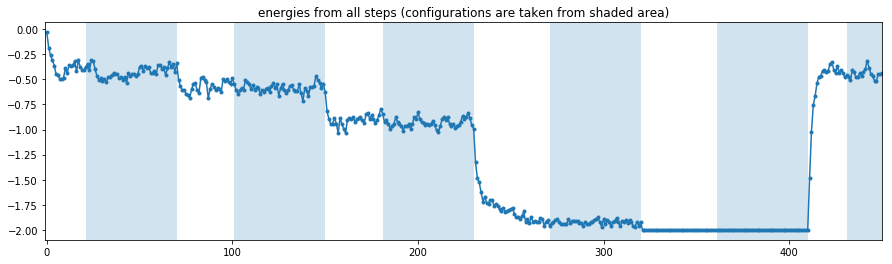

In [5]:
plt.figure(figsize=(15,4))
plt.title("energies from all steps (configurations are taken from shaded area)")
for x in [[21, 70], [101, 150], [181, 230], [271, 320], [361, 410], [431,480]]:
    plt.axvspan(x[0], x[1], alpha=0.2)
plt.plot(energies, '.-')
plt.xlim([-1,450])
plt.show()

Generate configurations for training

In [6]:
rep = 20
take = 20
temperature = np.concatenate([np.linspace(10, 5, 10, endpoint=False),np.linspace(5, 0.5, 20, endpoint=True)])
data_x, data_y, data_e = generate_data(size=[32,32], temperature=temperature, ferro=1, rep=rep, take=take)
print("size of data {}".format(data_x.shape))

total time 2.56 min
size of data (12000, 1024)


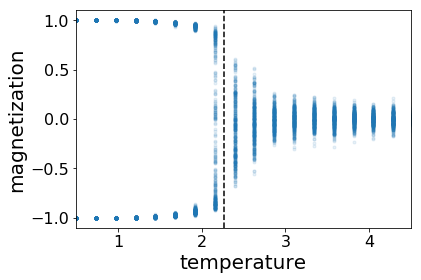

In [7]:
mag = np.mean(data_x, axis=1)
plt.figure()
plt.plot([Tc,Tc],[-1.1,1.1],'k--')
plt.plot(data_y, mag, '.', alpha=0.1)
plt.xlabel("temperature", fontsize=20)
plt.ylabel("magnetization", fontsize=20)
plt.xticks([1,2,3,4], fontsize=16)
plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=16)
plt.xlim([0.5,4.5])
plt.ylim([-1.1,1.1])
plt.show()

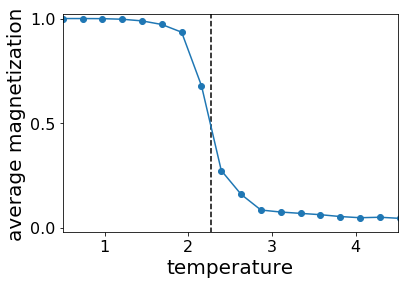

In [8]:
mag_ave = np.mean(np.mean(np.abs(mag).reshape([rep,-1,take]), axis=0), axis=-1)
plt.figure(figsize=(6,4))
plt.plot([Tc,Tc],[-0.1,1.1],'k--')
plt.plot(temperature, mag_ave, '-o')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("average magnetization", fontsize=20)
plt.xticks([1,2,3,4], fontsize=16)
plt.yticks([0, 0.5, 1], fontsize=16)
plt.ylim([-0.02,1.02])
plt.xlim([0.5,4.5])
plt.show()

## 2.1 Supervised learning

In [9]:
from sklearn.linear_model import LogisticRegression as lm
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neural_network import MLPClassifier as nn

Prepare training and testing data sets. Training data contains only configurations from low ($<$1.5) and high ($>$3.5) temperatures. Testing data is all data including configurations near transition temperature.

In [10]:
low_t = 1.5
high_t = 3.5
label = np.where(data_y<Tc, 1, 0).ravel()
select = np.argwhere( (data_y<low_t) | (data_y>high_t) )[:,0]
train_x = data_x[select, :]
train_y = label[select]

***simple logistic regression***

In [11]:
fit_lm = lm()
fit_lm.fit(train_x, train_y)
pred_lm = fit_lm.predict_proba(data_x)[:,1]
print("training R^2 = {:.2f}".format(fit_lm.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_lm.score(data_x, label)))

training R^2 = 0.77
testing  R^2 = 0.73


***random forest***

In [12]:
fit_rf = rf(n_estimators=500, max_features=0.33)
fit_rf.fit(train_x, train_y)
pred_rf = fit_rf.predict_proba(data_x)[:,1]

***neural network*** with one/two hidden layers

In [18]:
fit_nn1 = nn(hidden_layer_sizes=(100,), alpha=0.000, max_iter=2000)
fit_nn1.fit(train_x, train_y)
pred_nn1 = fit_nn1.predict_proba(data_x)[:,1]
print("One hidden layer:")
print("training R^2 = {:.2f}".format(fit_nn1.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn1.score(data_x, label)))

fit_nn2 = nn(hidden_layer_sizes=(100,20), alpha=0.000, max_iter=2000)
fit_nn2.fit(train_x, train_y)
pred_nn2 = fit_nn2.predict_proba(data_x)[:,1]
print("Two hidden layers:")
print("training R^2 = {:.2f}".format(fit_nn2.score(train_x, train_y)))
print("testing  R^2 = {:.2f}".format(fit_nn2.score(data_x, label)))

One hidden layer:
training R^2 = 1.00
testing  R^2 = 0.99
Two hidden layers:
training R^2 = 1.00
testing  R^2 = 0.99


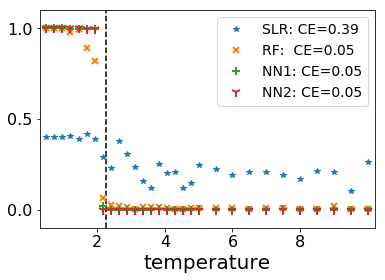

In [19]:
def cross_entropy(x, y):
    return -np.mean(np.where(y.ravel(), np.log(x.ravel()+1e-16), 0))
    
plt.figure()
plt.plot([Tc,Tc],[-0.1,1.1],'k--')
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], pred_lm.reshape([rep,-1,take])[0,:,0], '*', \
         label="SLR: CE={:.2f}".format(cross_entropy(pred_lm, label)))
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], pred_rf.reshape([rep,-1,take])[0,:,0], 'x', markeredgewidth=2, markersize=6, \
         label="RF:  CE={:.2f}".format(cross_entropy(pred_rf, label)))
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], pred_nn1.reshape([rep,-1,take])[0,:,0], '+', markeredgewidth=2, markersize=8, \
         label="NN1: CE={:.2f}".format(cross_entropy(pred_nn1, label)))
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], pred_nn2.reshape([rep,-1,take])[0,:,0], '1', markeredgewidth=2, markersize=9, \
         label="NN2: CE={:.2f}".format(cross_entropy(pred_nn2, label)))
plt.xlabel("temperature", fontsize=20)
plt.xticks([2,4,6,8], fontsize=16)
plt.yticks([0,0.5,1], fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.xlim([np.min(data_y)-0.2, np.max(data_y)+0.2])
plt.ylim([-0.1,1.1])
plt.show()

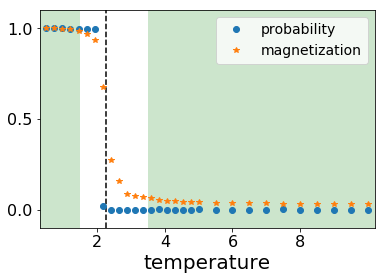

In [20]:
plt.figure(figsize=(6,4))
plt.plot([Tc,Tc],[-0.1,1.1],'k--')
plt.axvspan(np.min(data_y)-0.2, low_t, facecolor="g", alpha=0.2)
plt.axvspan(high_t, np.max(data_y)+0.2, facecolor="g", alpha=0.2)
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], pred_nn1.reshape([rep,-1,take])[0,:,0], 'o', label="probability")
plt.plot(data_y.reshape([rep,-1,take])[0,:,0], mag_ave, '*', label="magnetization")
plt.xlabel("temperature", fontsize=20)
plt.xticks([2,4,6,8], fontsize=16)
plt.yticks([0,0.5,1], fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.xlim([np.min(data_y)-0.2, np.max(data_y)+0.2])
plt.ylim([-0.1,1.1])
plt.show()

Look at the effects of neural network with one hidden layer.

temperature:1.45 
magnetization:-0.99 
probability:0.9998115974588115
Probability from model [[  1.88402541e-04   9.99811597e-01]]


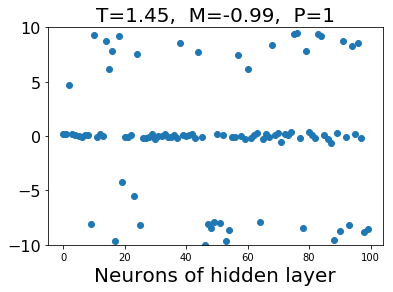

In [29]:
index = 500    # first 600 data is from temperature 10 to 0.5
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def activation(x):
    return np.where(x<0, 0, x)

coef = fit_nn1.coefs_
bias = fit_nn1.intercepts_
state0 = data_x[index]
state1 = np.dot(state0, coef[0]) + bias[0]
state2 = np.dot(activation(state1),coef[1]) + bias[1]
print("temperature:{:.2f} \nmagnetization:{:.2f} \nprobability:{}".format(data_y[index,0], np.mean(state0),sigmoid(state2)[0]))
print("Probability from model {}".format(fit_nn1.predict_proba([state0])))

plt.figure(figsize=(6,4))
plt.yticks([-10,-5,0,5,10], fontsize=16)
plt.ylim([-10,10])
plt.title("T={:.2f},  M={:.2f},  P={:.0f}".format(data_y[index,0], np.mean(state0),sigmoid(state2)[0]), fontsize=20)
plt.plot(state1, 'o')
plt.xlabel("Neurons of hidden layer", fontsize=20)
plt.show()

Look at the transformation between input and hidden layers

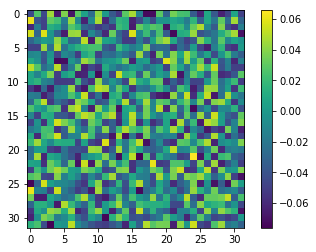

bias: -0.12419721564275028


In [18]:
index = 20
plt.figure()
plt.imshow(fit_nn1.coefs_[0][:,index].reshape([32,32])); plt.colorbar()
# plt.plot(fit_nn1.coefs_[0][:,index], 'o')
plt.show()
print("bias: {}".format(fit_nn1.intercepts_[0][index]))

Sometimes states are trapped in a local minimum when temperature is low

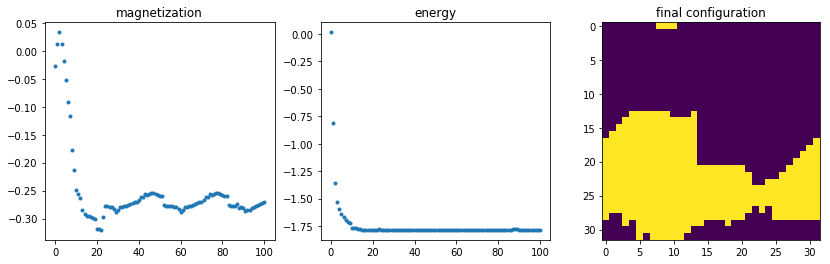

In [19]:
np.random.seed(1502507474)
state = 1-2*np.floor(np.random.random([32,32])+0.5)
energy = state_energy(state)
mag = [np.mean(state)]
ene = [energy]
for _ in range(100):
    energy = update(state, energy, 0.5, 1)
    mag.append(np.mean(state))
    ene.append(energy)

if abs(energy-state_energy(state))>1e-6:
    raise ValueError("Error when thermalizing: energy not match")
    
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title("magnetization")
plt.plot(np.array(mag),'.')
plt.subplot(1,3,2)
plt.title("energy")
plt.plot(np.array(ene)/32/32,'.')
plt.subplot(1,3,3)
plt.title("final configuration")
plt.imshow(state.reshape([32,32]))
plt.show()

## 2.2 Confusion

In [9]:
from sklearn.neural_network import MLPClassifier as nn
fit_nn = nn(hidden_layer_sizes=(100,), alpha=0.000, max_iter=2000)

In [10]:
haveTc = False

if haveTc:
    select = np.argwhere(data_y<5)[:,0]
else:
    select = np.argwhere(data_y>5)[:,0]
train_x = data_x[select, :]
train_y = data_y[select, 0]
print("selected data shape: {}".format(train_x.shape))

selected data shape: (4000, 1024)


In [11]:
def accuracy(x, y):
    return 1-np.mean(np.abs(x.ravel()-y.ravel()))

def cross_entropy(x, y):
    return -np.mean(np.where(y.ravel(), np.log(x.ravel()+1e-16), 0))
    
Tc_vals = np.linspace(min(train_y)+0.1, max(train_y)-0.1, 20, endpoint=True)

start = time()
current = time()

n = train_x.shape[0]
select_train = np.random.choice(n, int(n*0.7), replace=False)
select_test = np.delete(np.arange(n), select_train)
train_x0 = train_x[select_train,:]
train_y0 = train_y[select_train]
test_x0 = train_x[select_test,:]
test_y0 = train_y[select_test]

acc = []
err = []
for t in Tc_vals:
    fit_nn.fit(train_x0, np.where(train_y0<t, 1, 0))
    test_label = fit_nn.predict(test_x0)
    test_proba = fit_nn.predict_proba(test_x0)[:,1]
    label_y = np.where(test_y0<t, 1, 0)
    acc.append(accuracy(test_label, label_y))
    err.append(cross_entropy(test_proba, label_y))
    if time()-current>30:
        current = time()
        print("Critical point {:.2f} with accuracy {:.2f} and error {:.2f}".format(t, acc[-1], err[-1]))
print("total time: {:.2f} min".format((time()-start)/60.0) )

Critical point 6.96 with accuracy 0.68 and error 0.71
Critical point 8.54 with accuracy 0.74 and error 0.18
total time: 1.58 min


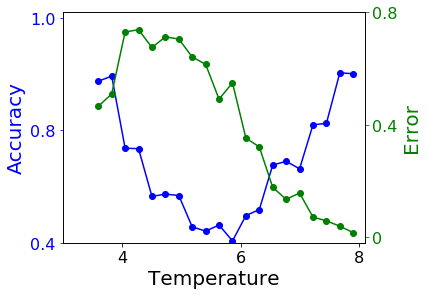

In [12]:
Tc = 2./np.log(1+np.sqrt(2))
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.7,0.8])
ax2 = ax1.twinx()
ax1.plot([Tc,Tc],[0.5,2],'k--')
ax1.plot(Tc_vals, acc, 'bo-')
ax2.plot(Tc_vals, err, 'go-')
ax1.set_ylabel("Accuracy", fontsize=20)
ax2.set_ylabel("Error", fontsize=20)
ax1.set_xlabel("Temperature", fontsize=20)
ax1.tick_params(axis='y', colors="blue")
ax1.yaxis.label.set_color("blue")
ax2.tick_params(axis='y', colors="green")
ax2.yaxis.label.set_color("green")
if haveTc:
    ax1.set_xlim([0.4,4.9])
    ax1.set_xticks([1,2,3,4])
    ax1.set_xticklabels([1,2,3,4], fontsize=16)
    ax1.set_ylim([0.7,1.01])
    ax1.set_yticks([0.7,0.8,0.9,1.0])
    ax1.set_yticklabels([0.7,0.8,0.9,1.0], fontsize=16)
    ax2.set_yticks([0,0.2,0.4])
    ax2.set_yticklabels([0,0.2,0.4], fontsize=16)
else:
    ax1.set_xlim([5,10.1])
    ax1.set_xticks([6,8,10])
    ax1.set_xticklabels([4,6,8,10], fontsize=16)
    ax1.set_ylim([0.6,1.01])
    ax1.set_yticks([0.6,0.8,1.0])
    ax1.set_yticklabels([0.4,0.8,1.0], fontsize=16)
    ax2.set_yticks([0,0.4,0.8])
    ax2.set_yticklabels([0,0.4,0.8], fontsize=16)
fig.canvas.draw()

## 2.3 PCA and K-means

In [27]:
from sklearn.cluster import KMeans as km

Prepare training data: take only 5 configurations at each temperature with value less than 5

In [14]:
index = np.arange(data_x.shape[0]).reshape([rep,len(temperature),take])
select = index[:,np.argwhere(temperature<5), -5:].ravel()
train_x = data_x[select,:]
train_y = data_y[select,0]
print("data size: {}".format(train_x.shape))

data size: (1900, 1024)


### 2.3.1 K-means

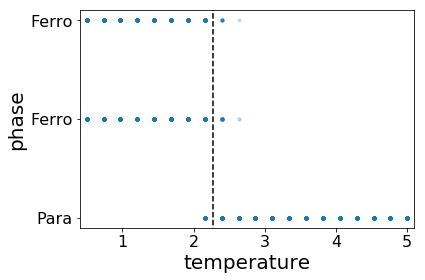

In [53]:
fit_m = km(n_clusters=3)
fit_m.fit(train_x)
pred = fit_m.predict(data_x)

plt.figure()
plt.plot(data_y, pred, '.',alpha=0.1)
plt.plot([Tc,Tc],[-1,3],'k--')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("phase", fontsize=20)
plt.xticks([1,2,3,4,5], fontsize=16)
plt.yticks([0,1,2], ["Para", "Ferro", "Ferro"], fontsize=16)
plt.xlim([0.4,5.1])
plt.ylim([-0.1,2.1])
plt.show()

### 2.3.2 PCA before K-means

In [ ]:
from sklearn.decomposition import PCA as pca

In [15]:
fit_pca = pca(n_components=10)
fit_pca.fit(train_x)
trans = fit_pca.transform(train_x)

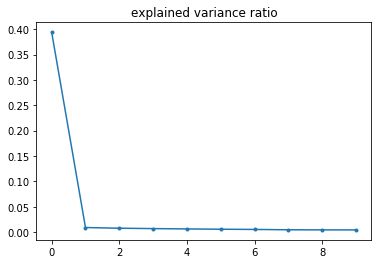

In [16]:
plt.figure()
plt.title("explained variance ratio")
plt.plot(fit_pca.explained_variance_ratio_, '.-')
plt.show()

Use K-means cluster method to seperate phases

In [31]:
fit_km = km(n_clusters=3)
fit_km.fit(trans)
center = fit_km.cluster_centers_

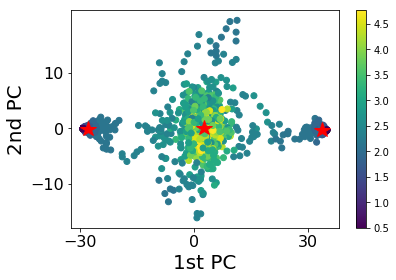

In [54]:
plt.figure()
plt.scatter(trans[:,0], trans[:,1], c=train_y)
plt.xlabel("1st PC", fontsize=20)
plt.ylabel("2nd PC", fontsize=20)
plt.xticks([-30,0,30], fontsize=16)
plt.yticks([-10,0,10], fontsize=16)
plt.plot(center[:,0], center[:,1], "r*", markersize=16)
plt.colorbar()
plt.show()

Predictions on the whole data set

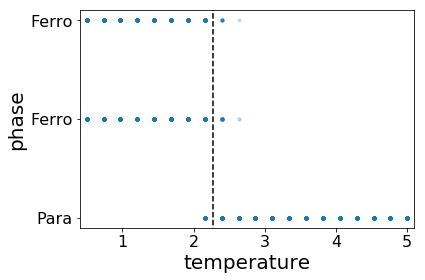

In [44]:
pred = fit_km.predict(fit_pca.transform(data_x))
plt.figure()
plt.plot(data_y, pred, '.',alpha=0.1)
plt.plot([Tc,Tc],[-1,3],'k--')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("phase", fontsize=20)
plt.xticks([1,2,3,4,5], fontsize=16)
plt.yticks([0,1,2], ["Para", "Ferro", "Ferro"], fontsize=16)
plt.xlim([0.4,5.1])
plt.ylim([-0.1,2.1])
plt.show()

### 2.4.3 Kernal PCA before k-means

In [45]:
from sklearn.decomposition import KernelPCA as kpca

In [46]:
fit_kpca = kpca(n_components=10, kernel=['linear','rbf'][1])
fit_kpca.fit(train_x)
transk = fit_kpca.transform(train_x)

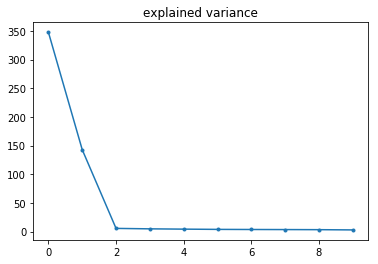

In [47]:
plt.figure()
plt.title("explained variance")
plt.plot(fit_kpca.lambdas_, '.-')
plt.show()

Use K-means cluster method to seperate phases

In [48]:
fit_kkm = km(n_clusters=3)
fit_kkm.fit(transk)
centerk = fit_kkm.cluster_centers_

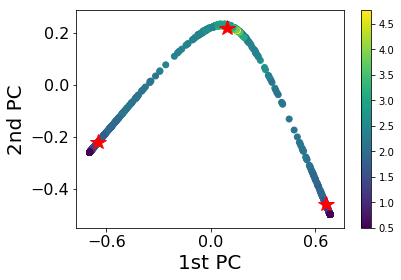

In [51]:
plt.figure()
plt.scatter(transk[:,0], transk[:,1], c=train_y)
plt.xlabel("1st PC", fontsize=20)
plt.ylabel("2nd PC", fontsize=20)
plt.xticks([-0.6,0,0.6], fontsize=16)
plt.yticks([-0.4,-0.2,0,0.2], fontsize=16)
plt.plot(centerk[:,0], centerk[:,1], "r*", markersize=16)
plt.colorbar()
plt.show()

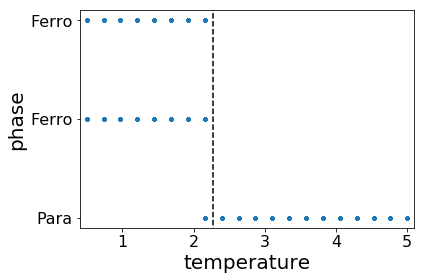

In [50]:
pred = fit_kkm.predict(fit_kpca.transform(data_x))
plt.figure()
plt.plot(data_y, pred, '.',alpha=0.1)
plt.plot([Tc,Tc],[-1,3],'k--')
plt.xlabel("temperature", fontsize=20)
plt.ylabel("phase", fontsize=20)
plt.xticks([1,2,3,4,5], fontsize=16)
plt.yticks([0,1,2], ["Para", "Ferro", "Ferro"], fontsize=16)
plt.xlim([0.4,5.1])
plt.ylim([-0.1,2.1])
plt.show()